# **Supervised Learning (Classfication) -- 1**
Supervised learning is a type of machine learning where an algorithm learns from a labeled dataset to make predictions or classifications.  It involves training a model on examples where the desired output(class labels) is already known, allowing the algorithm to learn the relationship between inputs and outputs and then apply that knowledge to new, unseen data.

Key steps in supervised learning include:
* Obtain a labeled data that contains both records and their labels
* Split the labeled data into two parts training data and test data.
* Use the training data to build a classification model that learns the relationship betweend data and their labels.
* Use the test data to evaluate the model performance. If possible, tune the hyperparameter to find a better model.
* If the model performance is satisfied, adopts it. Otherwise, employ different models or ensemble stratgies such as boosting to find a better performed model.

There are two fundamental supervised learning methods:
* Regression: predicts continuous numerical values
* Classification: predicts categorical labels

The topic covered in this lecture include:
* [Part 1 -- Linear Regression Model](#p1)
* [Part 2 -- Decision Tree Classifier](#p2)
* [Part 3 -- K Nearest Neighbors(KNN) Classifier](#p3)
* [Part 4 -- Naive Bayes Classifier](#p4)
* [Part 5 -- Support Vector Machine(SVM) Classifier](#p5)
* [Part 6 -- Cross Validation](#p6)

We will use sklearn, an open-source Python library for machine learning in this class.
Scikit-learn (formerly scikits. learn and also known as sklearn) is a free software machine learning library for the Python programming language.
[More information on Sklearn libaray](https://scikit-learn.org/stable/)

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


### Import Needed Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.datasets import *
import seaborn as sns

<a name="p1"> </a>
# **Part I: Linear Regression**
* [Problem 1: Movie Data](#p11)
* [Problem 2: California Housing Data](#p12)

<a name="p11"> </a>
## **Problem 1: Movie Data**
In this part, we will model the relationship between the numerical features and the Runtime (min) variable as the label using linear regression.

### Load Data

In [4]:
#
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS9jPkeKJ8QUuAl-fFdg3nJPDP6vx1byvIBl4yW8UZZJ9QEscyALJp1eywKeAg7aAffwdKP63D9osF1/pub?gid=169291584&single=true&output=csv"
movie_df = pd.read_csv(url)

movie_df.drop_duplicates(inplace=True)

mean_runtime = movie_df['Runtime'].mean()
movie_df['Runtime'] = movie_df['Runtime'].fillna(mean_runtime) #handle the missing values in Runtime column

movie_df = movie_df.rename(columns = {"Runtime": "Runtime (min)"})
movie_df = movie_df.astype({"Runtime (min)": "int64"})

movie_df.head()

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


### Decide independent and dependent variables
Examining the DataFrame, choose only the numerical variables (other than Runtime (min)) for the features and Runtime (min) for the label.

In [ ]:
features = movie_df[['Released_Year', 'IMDB_Rating', 'No_of_Votes', 'Gross']]
label = movie_df['Runtime (min)']

In [ ]:
movie_df.info()

In [ ]:
movie_df.describe()

,Released_Year,Runtime (min),IMDB_Rating,No_of_Votes,Gross
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,1991.221000,122.903000,7.949300,2.736929e+05,6.245165e+07
std,23.285669,28.071865,0.275491,3.273727e+05,1.051148e+08
min,1920.000000,45.000000,7.600000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,5.552625e+04,2.351568e+06
50%,1999.000000,119.000000,7.900000,1.385485e+05,1.791714e+07
75%,2009.000000,137.000000,8.100000,3.741612e+05,7.410387e+07
max,2020.000000,321.000000,9.300000,2.343110e+06,9.366622e+08


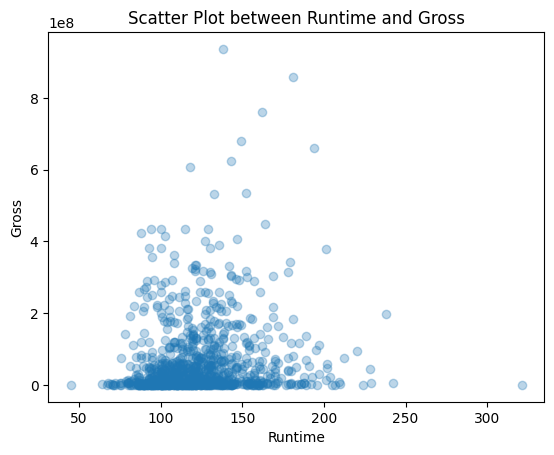

In [ ]:
plt.scatter(movie_df['Runtime (min)'], movie_df['Gross'], alpha=0.3)
plt.title('Scatter Plot between Runtime and Gross')
plt.xlabel('Runtime')
plt.ylabel('Gross')
plt.show()

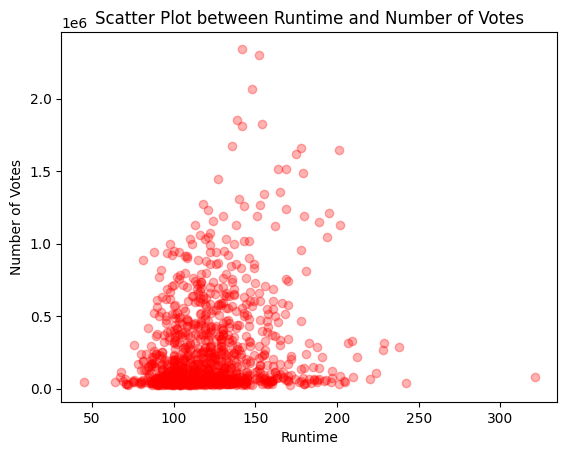

In [ ]:
plt.scatter(movie_df['Runtime (min)'], movie_df['No_of_Votes'], alpha=0.3, color='red')
plt.title('Scatter Plot between Runtime and Number of Votes')
plt.xlabel('Runtime')
plt.ylabel('Number of Votes')
plt.show()

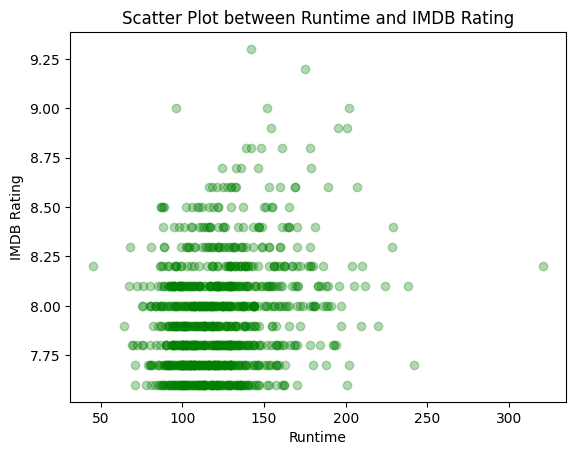

In [ ]:
plt.scatter(movie_df['Runtime (min)'], movie_df['IMDB_Rating'], alpha=0.3, color='green')
plt.title('Scatter Plot between Runtime and IMDB Rating')
plt.xlabel('Runtime')
plt.ylabel('IMDB Rating')
plt.show()

In [ ]:
movie_df[movie_df['Runtime (min)']> 200].shape[0]

17

In [ ]:
movie_df[movie_df.Gross > 600000000]

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
60,Avengers: Endgame,2019,181,Action,8.4,After the devastating events of Avengers: Infi...,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000
61,Avengers: Infinity War,2018,149,Action,8.4,The Avengers and their allies must be willing ...,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482
362,The Avengers,2012,143,Action,8.0,Earth's mightiest heroes must come together an...,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner,1260806,623279547
483,Star Wars: Episode VII - The Force Awakens,2015,138,Action,7.9,"As a new threat to the galaxy rises, Rey, a de...",J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225
629,Avatar,2009,162,Action,7.8,A paraplegic Marine dispatched to the moon Pan...,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625
658,Titanic,1997,194,Drama,7.8,A seventeen-year-old aristocrat falls in love ...,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379
898,Incredibles 2,2018,118,Animation,7.6,The Incredibles family takes on a new mission ...,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,Huck Milner,250057,608581744


### Split data into training and test data
Split the data using 80/20 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

### Build the linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
pred=lr.predict(X_test)

### Evaluate Model
Use mean squared error and the R2 score as the evaluation metrics

* **Mean Squared Error (MSE)** is a measure of the average squared difference between predicted and actual values in a dataset. It's a common metric used to evaluate the performance of regression models, where lower MSE indicates better model accuracy. Essentially, it quantifies the average squared "distance" between predictions and the real values.
* The **R-squared (R²)** is a statistical measure that represents the proportion of variance in the dependent variable that is explained by the independent variables in a regression model. **It ranges from 0 to 1, with higher values indicating a better fit of the model to the data**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test, pred)
r2s=r2_score(y_test, pred)
print(f'MSE: {mse},  r2_score: {r2s}')

### Use the model
Using the model we created, predict the runtime for two movies:

Movie 1: Released 1999, 7.9 IMDB Rating, 800,000 votes, $1,000,000 Gross

Movie 2: Released 2007, 8.5 IMDB Rating, 1,000,000 votes, $100,000,000 Gross

In [ ]:
movies=pd.DataFrame([[1999, 7.9, 800000, 1000000], [2007, 8.5, 1000000, 100000000]], columns =['Released_Year', 'IMDB_Rating', 'No_of_Votes', 'Gross'])

In [ ]:
pred_movies=lr.predict(movies)
print(pred_movies)

<a name="p12"> </a>
## **Problem 2: California Housing Dataset**
---

#### **About the Dataset**
The price of a home in California is nearly double the national average. The California Housing Dataset is a collection of data containing information on the median house value and other features of census block groups in California. This dataset was derived from the 1990 U.S. Census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The features are as follows:
* `MedInc`: median income in block group (in hundreds of thousands of dollars, i.e. \$100,000)
* `HouseAge`: median house age in block group
* `AveRooms`: average number of rooms per household
* `AveBedrms`: average number of bedrooms per household
* `Population`: block group population
* `AveOccup`: average number of household members
* `Latitude`: block group latitude
* `Longtitude`: block group longitude
* `TARGET`: median house value for California districts (in hundreds of thousands of dollars, i.e. $100,000)

#### **Your Task**
Using the California Housing dataset, you will be able to predict the median house value for a specific home.

As you build your model, try using different features for your model and see how the accuracy changes.


### Load Data

In [ ]:
from sklearn.datasets import fetch_california_housing

cali_data = fetch_california_housing()
df = pd.DataFrame(data=cali_data.data, columns=cali_data.feature_names)
df['TARGET'] = cali_data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Choose features(independent variables) and label(dependent variable)
Let's choose the following features:
* `HouseAge`
* `AveBedrms`
* `Latitude`
* `Longitude`

And the following label: `TARGET`.


In [ ]:
# Your code
features=['HouseAge','AveBedrms', 'Latitude', 'Longitude']
X=df[features]
y=df.TARGET

In [ ]:
features1=['MedInc', 'HouseAge','AveRooms','AveBedrms', 'Population', 'AveOccup']
X1=df[features1]

### Split the data into training and test data

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=142)

In [ ]:
#use 'MedInc', 'HouseAge','AveRooms','AveBedrms', 'Population', 'AveOccup' for training
X1_train, X1_test, y_train, y_test=train_test_split(X1, y, test_size=0.2, random_state=142)

### Build your model

In [ ]:
lg=LinearRegression()

In [ ]:
lg1=LinearRegression()

### Fit your model, test on the testing data

In [ ]:
lg.fit(X_train, y_train)

In [ ]:
pred=lg.predict(X_test)

In [ ]:
lg1.fit(X1_train, y_train)

In [ ]:
pred1=lg1.predict(X1_test)

### Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test, pred)
r2=r2_score(y_test, pred)
print(f'mse:  {mse: .4f},  r2_score: {r2: .4f}')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test, pred1)
r2=r2_score(y_test, pred1)
print(f'mse:  {mse: .4f},  r2_score: {r2: .4f}')

### Use the model
Use the model to predict the median house value for a home that is 51 years old, has an average of 7.2 bedrooms, and is at 38.1 latitude and -121.08 longitude.


NOTE: The predictions are in units of $100,000

In [ ]:
data1=pd.DataFrame(data=[[51, 7.2, 38.1,-121.08]], columns=features)

In [ ]:
pred1=lg.predict(data1)
print(pred1)

### **Follow Up**
For the problem 2, consider using more features to achieve a better regression model



<a name="p2"> </a>
# **Part 2 -- Decision Tree Classifier**
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
* [Load Data](#p10)
* [Construct the training and test dataset](#p11)
* [Select Classification Model -- Decision Tree](#p12)
  * [Model evalution](#p13)
  * [Possible Improvement by Feature Selection](#p14)
* [Visualize decision trees](#p15)
* [Exercise](#p16)


<a name="p10"> </a>
##   Use pandas to load data

In [ ]:
# Load diabetes data directly from sklearn.datasets, it is a bit different from diabetes.csv from my dataset repository, so it will not be used

from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes()

diabetes_df = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

In [ ]:
diabetes_df.shape

In [ ]:
import pandas as pd
df_diabetes = pd.read_csv("datasets/diabetes.csv")
df_diabetes

In [ ]:
import seaborn as sns
sns.pairplot(df_diabetes, hue='Outcome', height=3)

In [ ]:
df_diabetes.shape

In [ ]:
df_diabetes.size

In [ ]:
df_diabetes.head()

In [ ]:
df_diabetes.Outcome.value_counts()

<a name="p11"> </a>
## Retrieve the data and labels, and split them into the training and test datasets
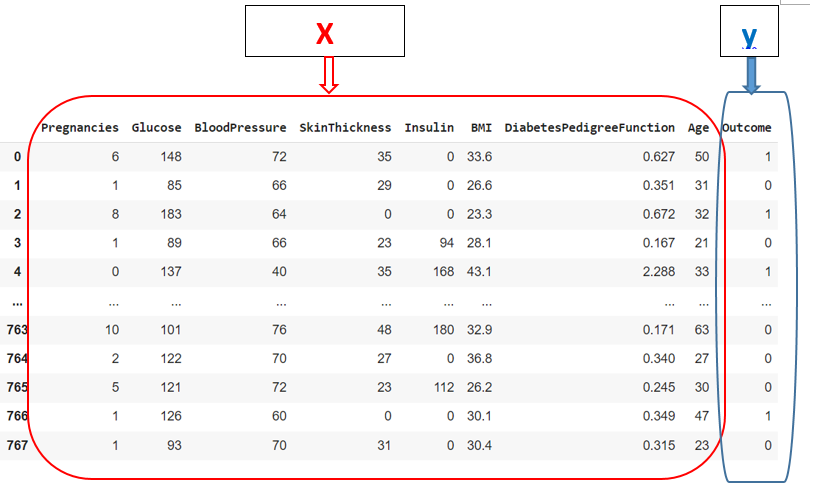

### Retrieve data and labels
by tradition, use X for data, and y for labels

In [ ]:
#Get the data and labels
import pandas as pd

X=df_diabetes.drop(['Outcome'], axis=1)
#X=data.drop(columns=['Outcome'])
y=df_diabetes['Outcome']
#y=data.Outcome


### Split the dataset into training and test datasets

In [ ]:
# split X into a training dataset and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=40)

<a name="p12"> </a>
## Select Classification Model -- Decision Tree

Decision Trees (DTs) are a supervised learning method used for classification and regression. It creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

### Build the decision tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

### Apply the decision tree to the test data and model evaluation

In [ ]:
y_pred=dt.predict(X_test)

<a name="p13"> </a>
### Model Evaluation (Other measures: recall_score, precision_score, f1_score)

recall=TP/(TP+FN)

precision= TP/(TP+FP)

Assume there are 100 positives in the test dataset, and 70 are classified correctly.  But the model generates 120 positives, 70 are true positives, and 50 are false positives

recall = 70/100=70%

precision=70/120=58%

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

ac=accuracy_score(y_test, y_pred)
ps=precision_score(y_test,y_pred)
rs=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)

print('accuracy: \t'+ str(ac))
print('precision score: \t' + str(ps))
print('recall score : \t' + str(rs))
print('f1 score: \t'+ str(f1))

#### **1. Generate Classification Report**

Build a text report showing the main classification metrics.

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred)
print(report)

#### **2. Get the confusion matrix**

A confusion matrix is a tabular way of visualizing the performance of your prediction model. Each entry in a confusion matrix denotes the number of predictions made by the model where it classified the classes correctly or incorrectly.
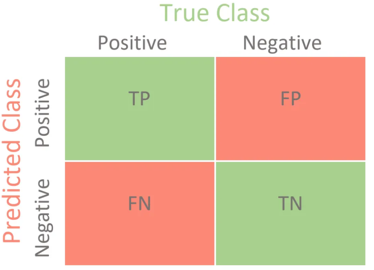

In [ ]:
#viridis is the default color
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [ ]:
# WE CAN ALSO SET THE COLOR OF THE CONFUSION MATRIX DISPLAY
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
#disp.plot(cmap=plt.cm.viridis)
#disp.plot(cmap=plt.cm.Greens)
#disp.plot(cmap=plt.cm.GnBu)
#disp.plot(cmap=plt.cm.spring)
#disp.plot(cmap=plt.cm.summer)
#disp.plot(cmap=plt.cm.autumn)
#disp.plot(cmap=plt.cm.winter)


<a name="p14"> </a>
### Possible Improvement by Feature Selection
Drop some features (columns) according to the correlation analysis and use the dataset with reduced features for learning**

#### **Correlation Analysis and Feature selection**

In [ ]:
# Get correlation among numeric attributes
import pandas as pd
cor = df_diabetes.corr(numeric_only=True)
print(cor)

#### **Generate a heatmap for cor**
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

[More on plt colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
#sns.heatmap(cor, annot=True, cmap=plt.cm.plasma)
#sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
#sns.heatmap(cor, annot=True, cmap=plt.cm.Oranges)
#sns.heatmap(cor, annot=True, cmap=plt.cm.Purples)
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

plt.show()

#### **Get features whose correlation scores with the target variable are higher than a threshold**

In [ ]:
cor_target=abs(cor['Outcome'])
print(cor_target)

In [ ]:
threshold=0.07
relevant_features=cor_target[cor_target > threshold]
relevant_features

#### **Drop insignificant columns**

In [ ]:
relevant_features.index

In [ ]:
X_rd=df_diabetes[relevant_features.index]
X_rd=X_rd.drop(['Outcome'], axis=1)
X_rd.head()

#### **Split the dataset into training and test dataset**

In [ ]:
X_train_rd, X_test_rd, y_train, y_test=train_test_split(X_rd, y, test_size=0.2, random_state=40)

#### **Build the decision tree model**

In [ ]:
dt_rd=DecisionTreeClassifier()
dt_rd.fit(X_train_rd, y_train)

#### **Apply the decision tree to the test data and model evaluation**

In [ ]:
y_pred_rd=dt_rd.predict(X_test_rd)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

ac_rd=accuracy_score(y_test, y_pred_rd)
ps_rd=precision_score(y_test, y_pred_rd)
rs_rd=recall_score(y_test, y_pred_rd)
f1_rd=f1_score(y_test, y_pred_rd)
print('accuracy: \t'+ str(ac_rd))
print('precision score: \t' + str(ps_rd))
print('recall score : \t' + str(rs_rd))
print('f1 score: \t'+ str(f1_rd))

####**Generate Classification Report**

Build a text report showing the main classification metrics.

In [ ]:
report_rd=classification_report(y_test, y_pred_rd)
print(report_rd)

In [ ]:
# classficiation report when using the whole dataset
print(report)

#### **Create and display confusion matrix**

In [ ]:
cm_rd=confusion_matrix(y_test, y_pred_rd)
disp=ConfusionMatrixDisplay(cm_rd)
disp.plot(cmap=plt.cm.summer)

<a name="p15"> </a>
## Visualize the decision tree -- 3 Methods

**1.  tree.export_text()**: to print the tree in the text format

In [ ]:
from sklearn import tree
txtTree=tree.export_text(dt)
print(txtTree)

**2. tree.plot_tree()**

In [ ]:
from sklearn.tree import plot_tree
plot_tree(decision_tree=dt)


In [ ]:
#set the figure size before generating the tree
from sklearn.tree import plot_tree
plt,ax=plt.subplots(figsize=(20,20))
plot_tree(decision_tree=dt, ax=ax)

**3. Using graphviz**

DOT is a graph description language, developed as a part of the Graphviz project.

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
dot_data=export_graphviz(dt, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True)
graph=graphviz.Source(dot_data)
graph

<a name="p16"></a>
## Exercise
* [Breast Cancer Dataset](#p5)
* [Real or Fake Money Dataset](#p6)

<a name="p1"></a>

---
## **Breast Cancer Dataset**
---
#### **About the Dataset**
We've already used the Breast Cancer dataset to create a KNN model for classification; now it's time to create a decision tree model using it. This dataset contains mammography exam results and whether or not cancer was detected.

The features are as follows:
* `radius`
* `texture`: standard deviation of gray-scale values
* `perimeter`
* `area`
* `smoothness`: local variations in radius lengths
* `compactness`: perimeter^2 / area - 1
* `concavity`: severity of concave portions of the contour
* `concave points`: number of concave portions of the contour
* `symmetry`
* `fractal dimension`: "coastline approximation" - 1
* `target`: Cancer or non-cancer

Note: There is data recorded for the mean, standard error, and worst (or largest) for each feature, resulting in 30 total features.
<br>

#### **Your Task**
Using the Breast Cancer dataset, we will do the following:
* Create a decision tree model in order to classify breast cancer tumors as malignant (0) or benign (1).

### Load and Preview Data

In [ ]:
#load the data
from sklearn.datasets import *

data = load_breast_cancer()

df_cancer = pd.DataFrame(data.data, columns=data.feature_names)
df_cancer['target'] = data.target
df_cancer

In [ ]:
df_cancer.info()

### Correlation Analysis and Feature Selection

In [ ]:
#get the correlation matrix


### Split Data into Training and Test Dataset

In [ ]:
# Decide predictor features and class label
y=df_cancer.target
X=df_cancer.drop(columns=['target'])
#X.head(5)

In [ ]:
#split the data into training dataset and test dataset


### Build Decision Tree Classifier

In [ ]:
# import the decision tree model


In [ ]:
# train the DT model


In [ ]:
# test the DT model


### Evaluate Decision Tree Classifier

In [ ]:
# evaluate the model using classification report


In [ ]:
# evaluate the model using confusion matrix


###**Challenge**
**Can you improve the performance using feature selction?**

In [ ]:
# evaluate the model using confusion matrix


## **Fake or Real Money**

The provided dataset contains information about real and fake banknotes (paper money). Each row represents information about an image of one banknote. This data contains 5 columns:

* `range` is the range of patterns in the banknote image
* `asymmetry` is the lack of symmetry in the banknote image
* `outliers` is the amount of patterns that don't fit in with the rest in the banknote image
* `information` is the amount of total information believed to be contained in the banknote image
* `class` is 0 if the banknote is real and 1 if the banknote is fake

In [ ]:
# Load data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRdRzlASrap1oY15IoQxXZnB5hi0RhIUCp_thFmTYOnJOw_xjR0X8sGDVyTSdPesIwqYEUQL_yelQpj/pub?gid=1496556477&single=true&output=csv"
df_banknote = pd.read_csv(url)

df_banknote.head()

In [ ]:
#Data examing and profiling

In [ ]:
# Retrieve data and label


In [ ]:
# Split the data into the training and test dataset


In [ ]:
# Build the decision tree model


In [ ]:
# Model Evaluation

### Correlation Analysis

<a name="p3"> </a>
#**Part 3 -- K-Neighbors Classifier**
The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier. It uses proximity to make classifications or predictions about the grouping of an individual data point. It is one of the popular and simplest classification and regression classifiers used in machine learning today

## Banknote Dataset

In [ ]:
#Use fake or real money data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRdRzlASrap1oY15IoQxXZnB5hi0RhIUCp_thFmTYOnJOw_xjR0X8sGDVyTSdPesIwqYEUQL_yelQpj/pub?gid=1496556477&single=true&output=csv"
df_banknote = pd.read_csv(url)

df_banknote.head()

In [ ]:
#Get data and class lables
X=df_banknote.drop(columns=['class'])
y=df_banknote['class']
X.head()

In [ ]:
df_banknote.shape

In [ ]:
#Split the data into the training and test dataset


In [ ]:
#import the libraries
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Train the model with n=3


In [ ]:
#Get the classification report


In [ ]:
#get the confusion matrix


In [ ]:
#train the model with n=5


In [ ]:
#get the classification report

In [ ]:
#use n_neighbors=20

## Breast cancer dataset

##**How to find the best n?**
A randomly selected ***n*** may not be the best value for the dataset.

<a name="p4"> </a>
# **Part 4 -- Naive Bayes Classifier**

Naive Bayes classifiers are supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

## Breast Cancer Dataset

### Generate the training and test datasets

In [ ]:
#Load the dataset

In [ ]:
#split the data into training and test data

### Train the Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB


### Apply the Naive Bayes Model to predict the class label of the test dataset

### Evaluate the Model

In [ ]:
#get accuracy score, and f1 score
from sklearn.metrics import accuracy_score, f1_score


## Banknote Dataset
Apply Naive Bayes Classifier to Banknote dataset

## Breast Cancer Dataset

<a name="p5"> </a>
# **Part 5 -- Support Vector Machine**
Support vector machines (SVMs) are powerful yet flexible supervised machine learning methods used for classification, regression, and, outliers detection. SVMs are very efficient in high dimensional spaces and generally are used in classification problems. SVMs are popular and memory efficient because they use a subset of training points in the decision function.

The main goal of SVMs is to divide the datasets into number of classes in order to find a maximum marginal hyperplane (MMH)

In [ ]:
#Train SVM the model
from sklearn.svm import SVC


In [ ]:
# Apply the SVM model on the test dataset

In [ ]:
#Evaluate the model performance using classification report

In [ ]:
#produce the confusion matrix and display it

## Banknote Dataset
Apply SVM on Banknote dataset

In [ ]:
#build the SVM model

In [ ]:
# Apply SVM on the test data

In [ ]:
#evaluate the model performance

In [ ]:
#produce the confusion matrix and display it

<a name="p6"> </a>
# **Part 6 -- Cross Validation**
Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.<br>
###**Question:**
Given a dataset and a number of classification algorithms, how to compare their peformances?

## Breast Cancer Data

In [ ]:
#load the data
from sklearn.datasets import *

data = load_breast_cancer()

df_cancer = pd.DataFrame(data.data, columns=data.feature_names)
df_cancer['target'] = data.target
df_cancer

In [ ]:
X=df_cancer.drop(columns=['target'])
y=df_cancer.target
X.head()

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=111)

### Decision Tree Classifier

In [ ]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeClassifier()
scores=cross_val_score(dt, X_train, y_train, cv=10, scoring='f1')
print(scores)
print(f'Mean scores: {scores.mean()} \t and the std: {scores.std()}')

### KNN Classifier

In [ ]:
# Perform Cross Validation on KNN Classifier
from sklearn.neighbors import KNeighborsClassifier


### Naive Bayes Classifier

In [ ]:
# Perform Cross Validation on Naive Bayes Classifier


### SVM

In [ ]:
# Perform Cross Validation on SVM


### Follow up
* Which classifier has better cross validation score?
* What is cross validation score used for?